In [4]:
import pandas as pd
from prophet.plot import plot_plotly, plot_components_plotly
from prophet import Prophet

In [6]:
data = pd.read_csv('MaunaLoaDailyTemps.csv')

data.dropna(inplace=True)
data.reset_index(drop=True, inplace=True)

In [7]:
data.head()

,DATE,MinTemp,MaxTemp,AvgTemp,Sunrise,Sunset
0,1/1/2014,33.0,46.0,40.0,657,1756
1,1/2/2014,35.0,50.0,43.0,657,1756
2,1/3/2014,36.0,45.0,41.0,657,1757
3,1/4/2014,32.0,41.0,37.0,658,1757
4,1/5/2014,24.0,38.0,31.0,658,1758


In [8]:
data = data[['DATE', 'AvgTemp']]
data.head()

,DATE,AvgTemp
0,1/1/2014,40.0
1,1/2/2014,43.0
2,1/3/2014,41.0
3,1/4/2014,37.0
4,1/5/2014,31.0


In [9]:
data.columns = ['ds', 'y']

In [11]:
data['ds'] = pd.to_datetime(data['ds'])
data.tail()

,ds,y
1816,2018-12-26,40.0
1817,2018-12-27,39.0
1818,2018-12-28,40.0
1819,2018-12-29,42.0
1820,2018-12-30,46.0


<Axes: xlabel='ds'>

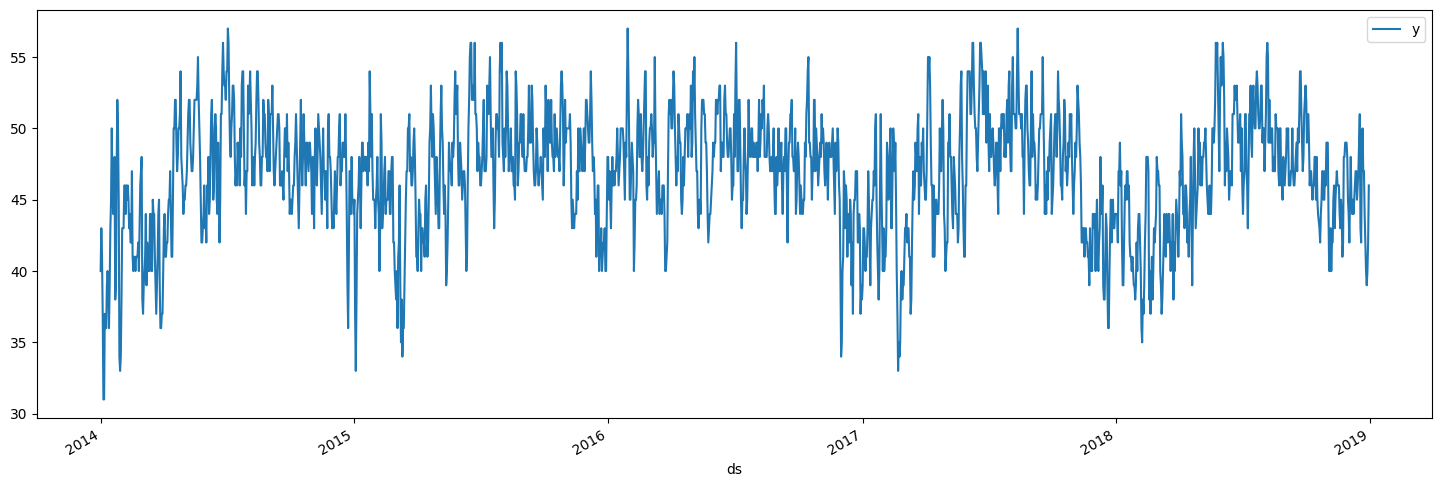

In [12]:
data.plot(x='ds', y='y', figsize=(18,6))

In [20]:
train = data.iloc[:len(data)-365]
test = data.iloc[len(data)-365:]

In [26]:
m = Prophet()
m.fit(train)
future = m.make_future_dataframe(periods=365)
forecast = m.predict(future)

16:10:07 - cmdstanpy - INFO - Chain [1] start processing
16:10:07 - cmdstanpy - INFO - Chain [1] done processing


In [27]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2014-01-01,43.938336,35.390812,43.704418,43.938336,43.938336,-4.579629,-4.579629,-4.579629,-0.052627,-0.052627,-0.052627,-4.527003,-4.527003,-4.527003,0.0,0.0,0.0,39.358707
1,2014-01-02,43.952353,35.410154,44.047490,43.952353,43.952353,-4.282384,-4.282384,-4.282384,0.098653,0.098653,0.098653,-4.381037,-4.381037,-4.381037,0.0,0.0,0.0,39.669968
2,2014-01-03,43.966369,35.945294,44.546184,43.966369,43.966369,-3.787427,-3.787427,-3.787427,0.426931,0.426931,0.426931,-4.214358,-4.214358,-4.214358,0.0,0.0,0.0,40.178942
3,2014-01-04,43.980386,35.607028,44.122680,43.980386,43.980386,-4.035366,-4.035366,-4.035366,-0.005809,-0.005809,-0.005809,-4.029556,-4.029556,-4.029556,0.0,0.0,0.0,39.945020
4,2014-01-05,43.994402,35.795010,44.081128,43.994402,43.994402,-4.068768,-4.068768,-4.068768,-0.239316,-0.239316,-0.239316,-3.829453,-3.829453,-3.829453,0.0,0.0,0.0,39.925634
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1816,2018-12-25,46.213661,36.907797,45.725867,44.674789,47.716828,-4.954518,-4.954518,-4.954518,-0.145803,-0.145803,-0.145803,-4.808715,-4.808715,-4.808715,0.0,0.0,0.0,41.259143
1817,2018-12-26,46.212951,36.620169,45.559976,44.667342,47.724759,-4.909944,-4.909944,-4.909944,-0.052627,-0.052627,-0.052627,-4.857318,-4.857318,-4.857318,0.0,0.0,0.0,41.303007
1818,2018-12-27,46.212241,36.918493,45.668472,44.659949,47.732689,-4.779080,-4.779080,-4.779080,0.098653,0.098653,0.098653,-4.877733,-4.877733,-4.877733,0.0,0.0,0.0,41.433161
1819,2018-12-28,46.211531,37.219160,46.483636,44.654161,47.740620,-4.442632,-4.442632,-4.442632,0.426931,0.426931,0.426931,-4.869563,-4.869563,-4.869563,0.0,0.0,0.0,41.768899


In [28]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
1816,2018-12-25,41.259143,36.907797,45.725867
1817,2018-12-26,41.303007,36.620169,45.559976
1818,2018-12-27,41.433161,36.918493,45.668472
1819,2018-12-28,41.768899,37.219160,46.483636
1820,2018-12-29,41.372111,36.661957,46.298574


In [29]:
test.tail()

,ds,y
1816,2018-12-26,40.0
1817,2018-12-27,39.0
1818,2018-12-28,40.0
1819,2018-12-29,42.0
1820,2018-12-30,46.0


In [31]:
plot_plotly(m, forecast)

NameError: name 'go' is not defined